### Exploratory data analysis of Sign Language MNIST

#### Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msg

#### Read the Sign Language MNIST data set

In [3]:
df_test= pd.read_csv("./sign_mnist_test.csv")

In [10]:
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [4]:
df_train = pd.read_csv("./sign_mnist_train.csv")

In [12]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


#### Basic information about data set

In [13]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [33]:
indices = [0, 1, 2, 14, 21]
df = df_train.query(f'label in {indices}')
lab = {indices[i]:i for i in range(len(indices))}
df['label'] = df.label.apply(lambda x: lab[x])

df = df.reset_index(drop=True)
df.head()

C:\Users\RAMAKANT MISHRA\AppData\Local\Temp\ipykernel_5124\2824771673.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df.label.apply(lambda x: lab[x])


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
1,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
2,4,131,135,139,143,145,146,149,152,153,...,174,192,191,191,191,191,193,191,190,191
3,1,146,149,150,150,151,152,152,153,153,...,196,197,197,196,196,195,194,194,190,187
4,1,134,136,139,140,142,144,146,146,146,...,168,162,164,161,164,174,168,157,149,141


#### Exploratory Data Analysis

    Making reialable labels, Comes from the original dataSet

In [35]:
import string
Alphabet_labels = list(string.ascii_letters)

In [34]:
imgWidth = int(np.sqrt(len(df.columns) - 1))


X_train = df.loc[:, 'pixel1':] / 255
print(f'Shape befor resizing: {X_train.shape}')
X_train = X_train.values.reshape(-1, imgWidth, imgWidth)
print(f'Shape after resizing: {X_train.shape}')

Shape befor resizing: (5558, 784)
Shape after resizing: (5558, 28, 28)


In [40]:
Y_train = df.loc[:, 'label']

In [41]:
np.unique(Y_train)

array([0, 1, 2, 3, 4], dtype=int64)

In [42]:
index = np.where(Y_train == 1)[0][0]
index

3

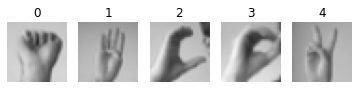

In [43]:
figure = plt.figure(figsize=(10, 10))
for i in range(len(indices)):
    index = np.where(Y_train == i)[0][0]
    ax = plt.subplot(6, 8, i + 1)
    plt.imshow(X_train[index])
    plt.title(i)
    plt.axis('off')

In [5]:
import cv2
import os

In [39]:
temp_train = []
temp_val = []
print(f'Shape befor resizing: {X_train[0].shape}')

for i in range(len(X_train)):
    gray_resized_img = cv2.resize(X_train[i], (32, 32))                                       # Resizing it to be 32 x 32.
    img_with_3Channels = cv2.merge((gray_resized_img, gray_resized_img, gray_resized_img))    # Converting it to RGB image.
    temp_train.append(img_with_3Channels)
    
# for i in range(len(X_val)):
#     gray_resized_img = cv2.resize(X_val[i], (32, 32))                                         # Resizing it to be 32 x 32.
#     img_with_3Channels = cv2.merge((gray_resized_img, gray_resized_img, gray_resized_img))    # Converting it to RGB image.
#     temp_val.append(img_with_3Channels)
    
    
X_train = np.array(temp_train)
X_val   = np.array(temp_val)

print(f'New shape is: {X_train[0].shape}')

Shape befor resizing: (28, 28)
New shape is: (32, 32, 3)


In [29]:
datagen = ImageDataGenerator(
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    rotation_range=10,
    validation_split=0.2
)

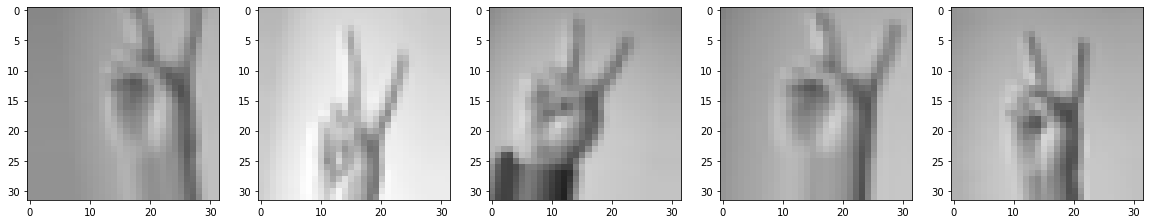

In [44]:
img = X_train[np.where(Y_train==4)]
fig, ax = plt.subplots(1, 5, figsize=(20, 10))
ax = ax.ravel()

for i in range(5):
    im = next(datagen.flow(img[i].reshape((1,32, 32, 3))))[0]
    ax[i].imshow(im)

### CNN Model

In [31]:
!pip3 install opencv-python

In [32]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [36]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [6]:
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras.layers.experimental.preprocessing as AugLayers
from tensorflow.keras import regularizers

In [7]:
process_input =  tf.keras.applications.mobilenet_v2.preprocess_input

In [8]:
checkpoint_path = "checkpoints/"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=False,
                                                 monitor='val_accuracy',
                                                 save_best_only=True,
                                                 mode='max',
                                                 verbose=1)

In [9]:
def scheduler(epoch, lr):
    if epoch < 2:
        return lr
    else:
        return lr * 0.99

    
lr_Scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose=1)

In [10]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, verbose=1)

In [23]:
def model(input_size = (32, 32)):
    imgSize = input_size + (3, )
    
    base_model = tf.keras.applications.MobileNetV2(
        input_shape = imgSize,
        include_top = False,
        weights     = 'imagenet')
    
    base_model.trainable = False
    
    
    inputs = tfl.Input(shape = imgSize)
    x      = process_input(inputs)
    
    x      = base_model(inputs, training = False)
    x      = tfl.GlobalAveragePooling2D()(x)
    
    x      = tfl.Dense(125, activation = 'relu')(x)
#     x      = tfl.Dropout(0.2)(x) 

    Outputs      = tfl.Dense(26, activation="softmax")(x)
    
    modle = tf.keras.Model(inputs, Outputs)
    
    return modle

In [24]:
Model = model()

In [27]:
# Unfreezing some layers
base_model = Model.layers[1]
base_model.trainable = True

freezing = len(base_model.layers) - 3
for layer in base_model.layers[:freezing]:
    layer.trainable = False

In [25]:
Model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 1, 1, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 125)               160125    
                                                                 
 dense_3 (Dense)             (None, 26)                3276      
                                                                 
Total params: 2,421,385
Trainable params: 163,401
Non-train

In [26]:
Model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             metrics=['accuracy'])

In [45]:
training = datagen.flow(X_train, Y_train, batch_size=32, shuffle=True, seed=123, subset='training')
validation = datagen.flow(X_train, Y_train, batch_size=32, shuffle=True, seed=123, subset='training')

In [46]:
history = Model.fit(training, validation_data=validation, epochs=10, batch_size = 32, verbose=1, callbacks=[cp_callback, early_stop])

Epoch 1/10
139/139 [==============================] - ETA: 0s - loss: 1.7304 - accuracy: 0.5042
Epoch 1: val_accuracy improved from -inf to 0.61682, saving model to checkpoints\


INFO:tensorflow:Assets written to: checkpoints\assets


INFO:tensorflow:Assets written to: checkpoints\assets


139/139 [==============================] - 76s 476ms/step - loss: 1.7304 - accuracy: 0.5042 - val_loss: 1.0324 - val_accuracy: 0.6168
Epoch 2/10
139/139 [==============================] - ETA: 0s - loss: 0.9404 - accuracy: 0.6586
Epoch 2: val_accuracy improved from 0.61682 to 0.66449, saving model to checkpoints\


INFO:tensorflow:Assets written to: checkpoints\assets


INFO:tensorflow:Assets written to: checkpoints\assets


139/139 [==============================] - 63s 453ms/step - loss: 0.9404 - accuracy: 0.6586 - val_loss: 0.8767 - val_accuracy: 0.6645
Epoch 3/10
139/139 [==============================] - ETA: 0s - loss: 0.8364 - accuracy: 0.6877
Epoch 3: val_accuracy improved from 0.66449 to 0.66652, saving model to checkpoints\


INFO:tensorflow:Assets written to: checkpoints\assets


INFO:tensorflow:Assets written to: checkpoints\assets


139/139 [==============================] - 71s 515ms/step - loss: 0.8364 - accuracy: 0.6877 - val_loss: 0.8445 - val_accuracy: 0.6665
Epoch 4/10
139/139 [==============================] - ETA: 0s - loss: 0.8457 - accuracy: 0.6778
Epoch 4: val_accuracy improved from 0.66652 to 0.70587, saving model to checkpoints\


INFO:tensorflow:Assets written to: checkpoints\assets


INFO:tensorflow:Assets written to: checkpoints\assets


139/139 [==============================] - 56s 402ms/step - loss: 0.8457 - accuracy: 0.6778 - val_loss: 0.8007 - val_accuracy: 0.7059
Epoch 5/10
139/139 [==============================] - ETA: 0s - loss: 0.7697 - accuracy: 0.7052
Epoch 5: val_accuracy improved from 0.70587 to 0.70834, saving model to checkpoints\


INFO:tensorflow:Assets written to: checkpoints\assets


INFO:tensorflow:Assets written to: checkpoints\assets


139/139 [==============================] - 46s 331ms/step - loss: 0.7697 - accuracy: 0.7052 - val_loss: 0.7641 - val_accuracy: 0.7083
Epoch 6/10
139/139 [==============================] - ETA: 0s - loss: 0.7817 - accuracy: 0.7099
Epoch 6: val_accuracy did not improve from 0.70834
139/139 [==============================] - 30s 216ms/step - loss: 0.7817 - accuracy: 0.7099 - val_loss: 0.7700 - val_accuracy: 0.7054
Epoch 7/10
139/139 [==============================] - ETA: 0s - loss: 0.7608 - accuracy: 0.7104
Epoch 7: val_accuracy improved from 0.70834 to 0.70902, saving model to checkpoints\


INFO:tensorflow:Assets written to: checkpoints\assets


INFO:tensorflow:Assets written to: checkpoints\assets


139/139 [==============================] - 54s 388ms/step - loss: 0.7608 - accuracy: 0.7104 - val_loss: 0.7647 - val_accuracy: 0.7090
Epoch 8/10
139/139 [==============================] - ETA: 0s - loss: 0.7806 - accuracy: 0.7000
Epoch 8: val_accuracy improved from 0.70902 to 0.71172, saving model to checkpoints\


INFO:tensorflow:Assets written to: checkpoints\assets


INFO:tensorflow:Assets written to: checkpoints\assets


139/139 [==============================] - 58s 420ms/step - loss: 0.7806 - accuracy: 0.7000 - val_loss: 0.7568 - val_accuracy: 0.7117
Epoch 9/10
139/139 [==============================] - ETA: 0s - loss: 0.7663 - accuracy: 0.7097
Epoch 9: val_accuracy did not improve from 0.71172
139/139 [==============================] - 35s 252ms/step - loss: 0.7663 - accuracy: 0.7097 - val_loss: 0.7637 - val_accuracy: 0.7097
Epoch 10/10
139/139 [==============================] - ETA: 0s - loss: 0.7495 - accuracy: 0.7176
Epoch 10: val_accuracy improved from 0.71172 to 0.71576, saving model to checkpoints\


INFO:tensorflow:Assets written to: checkpoints\assets


INFO:tensorflow:Assets written to: checkpoints\assets


139/139 [==============================] - 62s 445ms/step - loss: 0.7495 - accuracy: 0.7176 - val_loss: 0.7271 - val_accuracy: 0.7158


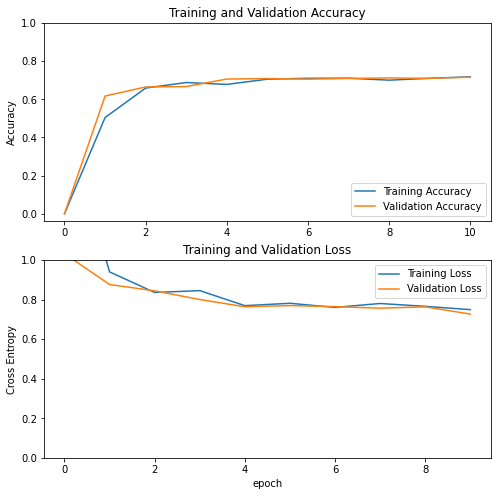

In [47]:
acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()